In [2]:
import matplotlib.pyplot as plt
%run data.ipynb
%run search_functions.ipynb

data.ipynb:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "source": [


In [8]:
start_date = pd.to_datetime('1997-01-01')
end_date = pd.to_datetime('2001-12-31')
ndq_price = ndq_price[start_date:end_date]

C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: `item` has been deprecated and will be removed in a future version


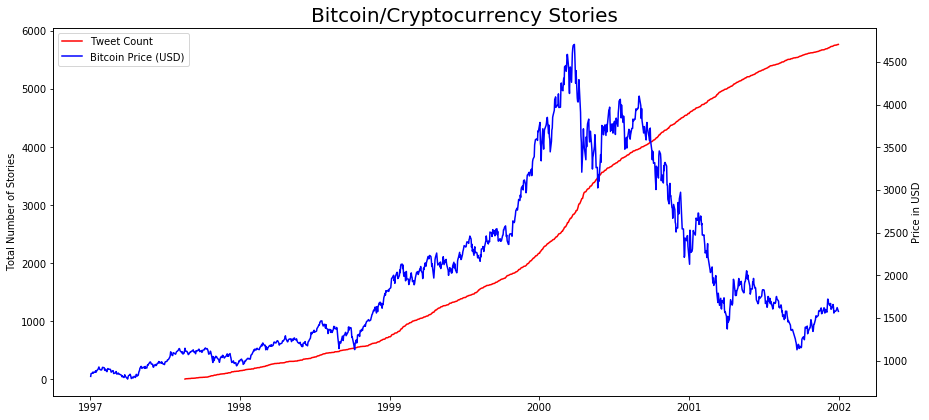

In [9]:
#graph 1
fig, ax1 = plt.subplots()
fig.tight_layout()
fig.set_size_inches(13, 6, forward=True)

lns1 = ax1.plot(get_num_stories_df(fdata), color='r', label='Tweet Count')
ax1.set_title("Bitcoin/Cryptocurrency Stories", size = 20) 
ax1.set_ylabel('Total Number of Stories')
ax1.set_xlabel("")


ax2 = ax1.twinx() 
lns2 = ax2.plot(ndq_price, color='b', label="Bitcoin Price (USD)")
ax2.set_ylabel('Price in USD')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: `item` has been deprecated and will be removed in a future version
C:\Users\jackl\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: `item` has been deprecated and will be removed in a future version


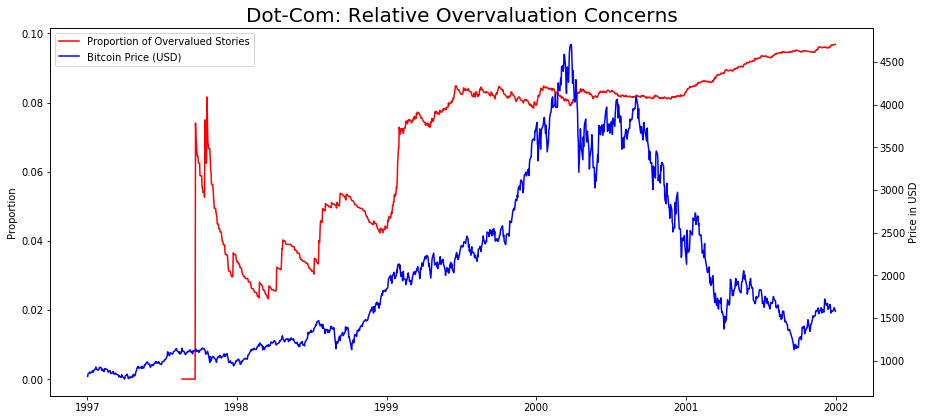

In [11]:
#graph 2

overval_terms = ['bubble', 'overval', "too high",'crash', 'collapse', 'mania', 'burst', 
                 'sky-high', 'lost its senses', 'strange', 'bizarre', 'psychology', 'implode', 
                 'black hole', 'unwarrant', 'irrational', 'tulip', 'euphori',
                 'short sell', 'bandwagon']

overval_df = get_subset_df(overval_terms, fdata)
df = get_prop_df(overval_df, fdata)

fig, ax1 = plt.subplots()
fig.tight_layout()
fig.set_size_inches(13, 6, forward=True)

lns1 = ax1.plot(df, color='r', label='Proportion of Overvalued Stories')
ax1.set_title("Dot-Com: Relative Overvaluation Concerns", size = 20) 
ax1.set_ylabel("Proportion")
ax1.set_xlabel("")

ax2 = ax1.twinx() 
lns2 = ax2.plot(ndq_price, color='b', label="Bitcoin Price (USD)")
ax2.set_ylabel('Price in USD')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

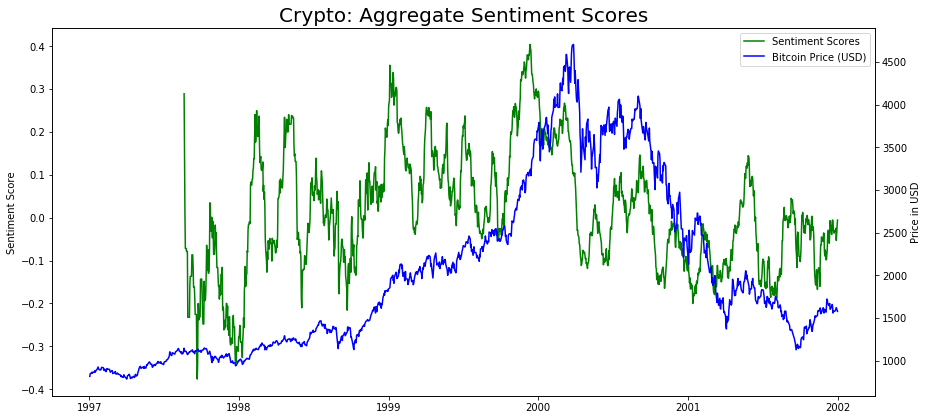

In [15]:
#graph 3
fig, ax1 = plt.subplots()
fig.tight_layout()
fig.set_size_inches(13, 6, forward=True)

lns1 = ax1.plot(get_rolling_av_df(30, fdata), color='g', label='Sentiment Scores')
ax1.set_title("Crypto: Aggregate Sentiment Scores", size = 20) 
ax1.set_ylabel('Sentiment Score')
ax1.set_xlabel("")

ax2 = ax1.twinx() 
lns2 = ax2.plot(ndq_price, color='b', label="Bitcoin Price (USD)")
ax2.set_ylabel('Price in USD')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.show()

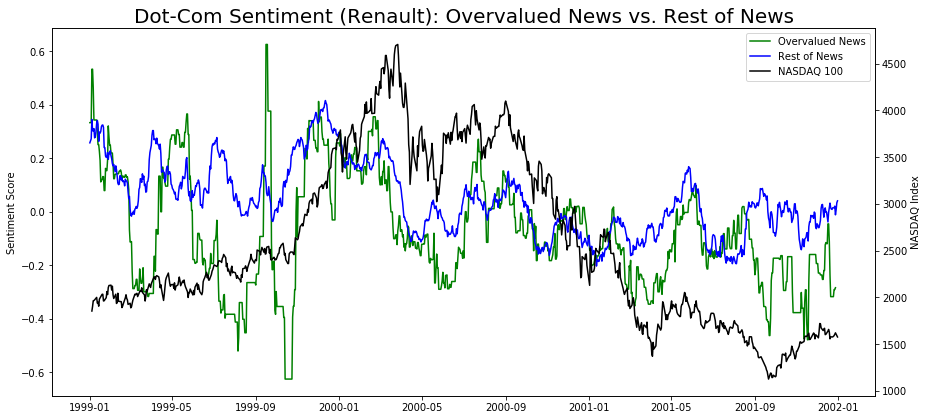

In [49]:
#graph 4
nonoverval_df = pd.concat([overval_df, fdata]).drop_duplicates(keep=False)
start_date = pd.to_datetime('1999-01-01')

fig, ax1 = plt.subplots()
fig.tight_layout()
fig.set_size_inches(13, 6, forward=True)

lns1 = ax1.plot(get_rolling_av_df(30, overval_df)[start_date:], color='g', label='Overvalued News')
lns2 = ax1.plot(get_rolling_av_df(30, nonoverval_df)[start_date:], color='b', label='Rest of News')

ax1.set_title("Dot-Com Sentiment (Renault): Overvalued News vs. Rest of News", size = 20) 
ax1.set_ylabel('Sentiment Score')
ax1.set_xlabel("")

ax2 = ax1.twinx() 
lns3 = ax2.plot(ndq_price[start_date:], color='k', label="NASDAQ 100")
ax2.set_ylabel('NASDAQ Index')

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
plt.show()

In [18]:
#Welch t-test
from scipy import stats

In [19]:
print("Entire sample: ", stats.ttest_ind(overval_df['sent_score'], nonoverval_df['sent_score']))

Entire sample:  Ttest_indResult(statistic=-3.969972004532979, pvalue=7.275531481588003e-05)


In [50]:
bubble_pop_date = pd.to_datetime('2000-03-15')
pre_bubble_overval = overval_df[(overval_df['date'] < bubble_pop_date) & (overval_df['date'] > start_date)]
pre_bubble_nonoverval = nonoverval_df[(nonoverval_df['date'] < bubble_pop_date) & (nonoverval_df['date'] > start_date)]
print("Pre-burst sample: ", stats.ttest_ind(pre_bubble_overval['sent_score'], pre_bubble_nonoverval['sent_score']))

Pre-burst sample:  Ttest_indResult(statistic=-2.7171200610137647, pvalue=0.006642032416249312)


In [53]:
pre_bubble_overval['sent_score'].mean()

0.03953847976885202

In [54]:
pre_bubble_nonoverval['sent_score'].mean()

0.1714518037228263

In [51]:
overval_df['sent_score'].mean()

-0.07131187528485698

In [52]:
nonoverval_df['sent_score'].mean()

0.039018418174946584